Columns: ['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language', 'original_title', 'overview', 'popularity', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'vote_average', 'vote_count']
Avatar was created in:  2009
The revenue of Spectre is: 880674609
The rating of the Pirates of the Caribbean is: 6.95
Number of Action movies in the dataset is: 1154
The number of missing values is:
 budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title           

7595744915573407.0

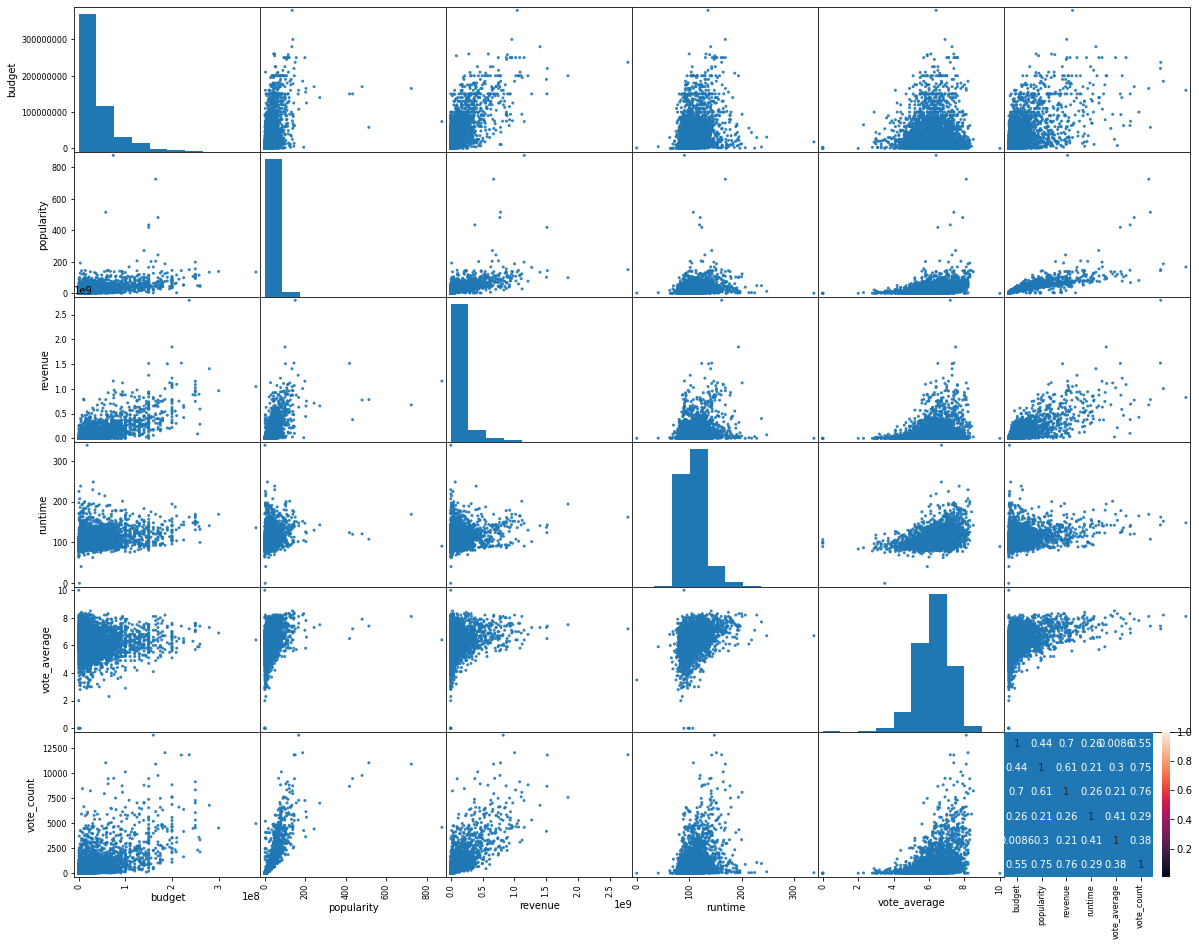

In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

#Explore the Data
movies = pd.read_csv("tmdb_5000_movies.csv")
print('Columns:',movies.columns.tolist())
release_date=movies[movies["title"]=="Avatar"]["release_date"]
year= release_date.iloc[0].split("-")[0]
print("Avatar was created in: ",year)
revenue=movies[movies["title"]=="Spectre"]["revenue"]
print("The revenue of Spectre is:",revenue.iloc[0])
rating=movies[movies["title"].str.contains("Pirates of the Caribbean")]["vote_average"]
print("The rating of the Pirates of the Caribbean is:",rating.mean())
action_movies=movies[movies["genres"].str.contains('"name": "Action"')]['genres']
print("Number of Action movies in the dataset is:",action_movies.shape[0])

#Data Cleaning
print("The number of missing values is:\n",movies.isnull().sum())
movies.drop(["id","homepage","original_title","original_language","production_countries","overview"], axis=1, inplace=True)
print("Columns now are:", movies.columns.tolist())
print("Number of missing in each feature is:\n",movies.isnull().sum())
movies.dropna(inplace=True)
print("Number of rows after removing nulls:",movies.shape[0])

zero_budget_inedices=movies[movies["budget"]==0].index
movies.drop(zero_budget_inedices, inplace=True)
print("Number of rows after removing a zero budge:",movies.shape[0])

#Data Analysis
pd.plotting.scatter_matrix(movies, figsize=(20,16),alpha=0.9)


 
#Predict
scaler=StandardScaler()
X,Y1,Y2= movies.loc[:,["budget","popularity","runtime","vote_count"]], movies["revenue"], movies["vote_average"]
print(Y1.shape[0])
print(X.shape[0])
X=scaler.fit_transform(X)

x1_train, x1_test, y1_train, y1_test = train_test_split(X,Y1,train_size =0.8)
model= LinearRegression()
model.fit(x1_train,y1_train)

prediction_score=model.score(x1_test,y1_test)
print("Prediction Score:", prediction_score)
predictions=model.predict(x1_test)
print("Predictions:", predictions)


#My Movie
My_Movie=pd.DataFrame(np.array([[100000000,75.00,135,1500,30000000,8.5]]))
My_Movie

test_movie= My_Movie.iloc[:,0:4].values
test_movie

y_credits= model.predict(test_movie)
float(y_credits)



